In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

DATA ANALYSIS

In [2]:
data = pd.read_csv("netflix_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
data.shape #8807 rows and 12 attributes

(8807, 12)

In [4]:
num_vars = data.columns[data.dtypes != 'object']
cat_vars = data.columns[data.dtypes == 'object']
data.isnull().sum().sort_values(ascending = False)/len(data) *100 # List % of data missing

director        29.908028
country          9.435676
cast             9.367549
date_added       0.113546
rating           0.045418
duration         0.034064
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [5]:
print(data[num_vars].min()) # No outliers
print(data[num_vars].max())

release_year    1925
dtype: int64
release_year    2021
dtype: int64


<AxesSubplot:>

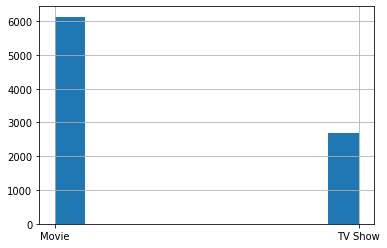

In [6]:
data['type'].hist()

In [7]:
data['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

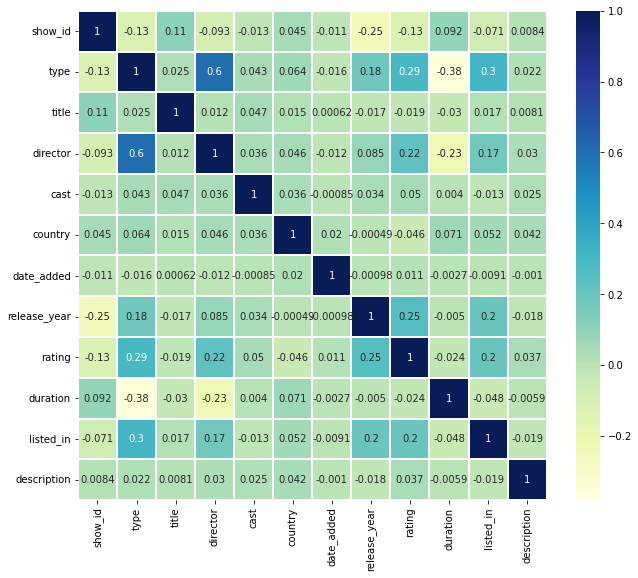

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

plt.figure(figsize=(10.5,9))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True) # Less correlation
plt.yticks(rotation=0);

MERGING DATASETS TO ADD RATINGS

In [9]:
import  pandas as pd
import random
import numpy as np

netflix = pd.read_csv('netflix_titles.csv')
rated = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')

netflix.columns = netflix.columns.str.capitalize()
rated = rated.drop(['Unnamed: 0', 'ID',  'Year', 'Age', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres', 'Country', 'Runtime','Language'], axis = 1)

netflix["Title"] = netflix["Title"].str.lower()
rated["Title"] = rated["Title"].str.lower()

result = pd.merge(netflix, rated, how="left", on="Title")#Add ratings on movies that exist in both datasets
                                                         #Join datasets with KEY = Titles
result['IMDb'] = result['IMDb'].fillna(rated['IMDb'])
result['Rotten Tomatoes'] = result['Rotten Tomatoes'].fillna(rated['Rotten Tomatoes'])#Get ratings from other dataset

result['IMDb'] = result['IMDb'].fillna(method='ffill')#Fill remaining NaN values
result['Rotten Tomatoes'] = result['Rotten Tomatoes'].fillna(method='ffill')

result.head()

,Show_id,Type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Listed_in,Description,IMDb,Rotten Tomatoes
0,s1,Movie,dick johnson is dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",7.5/10,64/100
1,s2,TV Show,blood & water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",8.4/10,97/100
2,s3,TV Show,ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0/10,95/100
3,s4,TV Show,jailbirds new orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",8.1/10,94/100
4,s5,TV Show,kota factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,7.7/10,94/100


In [10]:
netflix.head()

,Show_id,Type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Listed_in,Description
0,s1,Movie,dick johnson is dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,blood & water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,jailbirds new orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,kota factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
rated.head()

,Title,IMDb,Rotten Tomatoes
0,the irishman,7.8/10,98/100
1,dangal,8.4/10,97/100
2,david attenborough: a life on our planet,9.0/10,95/100
3,lagaan: once upon a time in india,8.1/10,94/100
4,roma,7.7/10,94/100


In [12]:
def clean_imdb(x):
    return float(x[:-3])

def clean_rotten(x):
    return int(x[:-4])

result['IMDb'] = result['IMDb'].apply(clean_imdb)
result['Rotten Tomatoes'] = result['Rotten Tomatoes'].apply(clean_rotten)
result.head()

,Show_id,Type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Listed_in,Description,IMDb,Rotten Tomatoes
0,s1,Movie,dick johnson is dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",7.5,64
1,s2,TV Show,blood & water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",8.4,97
2,s3,TV Show,ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,95
3,s4,TV Show,jailbirds new orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",8.1,94
4,s5,TV Show,kota factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,7.7,94


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
result['Description'] = result['Description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(result['Description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(8807, 18895)

In [14]:
#the dataset has 18895 words describing 8807 movies

#Here, The Cosine similarity score is used since it is independent of magnitude 
#and is relatively easy and fast to calculate.

# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

indices = pd.Series(result.index, index=result['Title']).drop_duplicates()

cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.01538292,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.02230089],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.01538292, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.02230089, ..., 0.        , 0.        ,
        1.        ]])

In [15]:
def get_recommendations_tf(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return result['Title'].iloc[movie_indices]

#This recommendation is just based on the Plot.

get_recommendations_tf('peaky blinders')

7683                    our godfather
2646                   my stupid boss
3133                              don
8293                         the fear
7140    jonathan strange & mr norrell
7785                power rangers zeo
8467                       the prison
8539                       the tudors
1510                    the con is on
8391     the legend of michael mishra
Name: Title, dtype: object

In [16]:
#content based filtering on Title, Cast, Director, Listed in, Plot
filledna=result.fillna('')

#clean dataset (making all lowercase)
def clean_data(x):
        return str.lower(x.replace(" ", ""))
    
features=['Title','Director','Cast','Listed_in','Description']
filledna=filledna[features]

In [17]:
#Creating a "soup" or a "bag of words" for all rows.
def create_soup(x):
    return x['Title']+ ' ' + x['Director'] + ' ' + x['Cast'] + ' ' +x['Listed_in']+' '+ x['Description']

filledna['Soup'] = filledna.apply(create_soup, axis=1)


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['Soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['Title'])

In [18]:
def get_recommendations_multiple(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return result['Title'].iloc[movie_indices]

In [19]:
get_recommendations_multiple('peaky blinders', cosine_sim2)

4809                  kiss me first
5032    the frankenstein chronicles
6922                   happy valley
3034                    giri / haji
2184                       get even
5716                       paranoid
7333                     london spy
3789                 killer ratings
5278                        apaches
1991                   criminal: uk
Name: Title, dtype: object

In [30]:
# random.seed(32323)
# #r = random.randint(1,result.shape[0])
# #7 57 still game
r = 27
res = result.copy(deep=True)

def get_similar(r, sel = 1):
    guess = result.iloc[r]['Title']
    actual_IMDb = result.iloc[r]['IMDb']
    actual_Rott = result.iloc[r]['Rotten Tomatoes']

    director = result.iloc[r]['Director']
    cast = result.iloc[r]['Cast']
    listed_as = result.iloc[r]['Listed_in']

    result.drop(r)
    ratings_of_similar = [7]
    sim_recs = []
    if str(director) != 'nan':
#         same_director = result[result['Director'].isin([director])]
#         ratings_of_similar.append(same_director['IMDb'].mean())
#         sim_recs.extend(same_director['Title'].values)
        
        indices = []
        director = director.split(", ")
        same_director = result["Director"].str.findall("|".join(director))
        same_director = same_director.fillna(value="")
        for i in range(len(same_director)):
            if len(same_director.iloc[i]) != 0:
                indices.append(i)
        ratings_of_similar.append(result.iloc[indices]['IMDb'].mean())
        sim_recs.extend(result.iloc[indices]['Title'].values)

    if str(cast) != 'nan':
        indices = []
        cast = cast.split(", ")
        same_cast = result["Cast"].str.findall("|".join(cast))
        same_cast = same_cast.fillna(value="")
        for i in range(len(same_cast)):
            if len(same_cast.iloc[i]) != 0:
                indices.append(i)
        ratings_of_similar.append(result.iloc[indices]['IMDb'].mean())
        sim_recs.extend(result.iloc[indices]['Title'].values)

    if str(listed_as) != 'nan':
        listed_as = listed_as.split(", ")
        same_type = result[result['Director'].isin([listed_as])]
        ratings_of_similar.append(same_type['IMDb'].mean())
        sim_recs.extend(same_type['Title'].values)
    if sel == 2:
        return set(sim_recs)
    return (ratings_of_similar, actual_IMDb)

In [31]:
sum_a = sum_b = 0
for i in range(100):
    ratings, IMDb = get_similar(i)
    sum_a += max(ratings)
    sum_b += IMDb
print("Accuracy: ",sum_a/sum_b)

Accuracy:  0.9612554112554114


In [22]:

system1 = get_recommendations_multiple('peaky blinders', cosine_sim2)
system2 = get_similar(3452, 2)
top5 = [0]
top5_titles = []
recs = res[res['Title'].isin(system2)]
# recs = recs[recs['Release_year'] == 2021]
recs.sort_values(['Rotten Tomatoes'], ascending=[0]).head()

,Show_id,Type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Listed_in,Description,IMDb,Rotten Tomatoes
8616,s8617,Movie,transcendence,Wally Pfister,"Johnny Depp, Rebecca Hall, Morgan Freeman, Pau...","United Kingdom, China, United States","November 1, 2018",2014,PG-13,119 min,"Sci-Fi & Fantasy, Thrillers",Two computer scientists work to achieve techno...,8.4,90
1138,s1139,Movie,the pianist,Roman Polański,"Adrien Brody, Thomas Kretschmann, Frank Finlay...","United Kingdom, France, Poland, Germany, Unite...","April 1, 2021",2002,R,149 min,"Dramas, Independent Movies, International Movies",Famed Polish pianist Wladyslaw Szpilman strugg...,8.5,86
8580,s8581,Movie,thor: ragnarok,Taika Waititi,"Chris Hemsworth, Tom Hiddleston, Cate Blanchet...",United States,"June 5, 2018",2017,PG-13,131 min,"Action & Adventure, Comedies, Sci-Fi & Fantasy",To save Asgard from a bloodthirsty goddess of ...,7.9,86
1912,s1913,Movie,hunt for the wilderpeople,Taika Waititi,"Sam Neill, Julian Dennison, Rima Te Wiata, Rac...",New Zealand,"October 1, 2020",2016,PG-13,101 min,"Action & Adventure, Comedies, Dramas",A misadventure in the wilderness leads to life...,7.9,80
2860,s2861,Movie,hugo,Martin Scorsese,"Ben Kingsley, Sacha Baron Cohen, Asa Butterfie...","United Kingdom, United States, France","March 1, 2020",2011,PG,127 min,"Children & Family Movies, Dramas","Living inside a Paris train station, an orphan...",7.5,79


In [23]:
res[res['Title'].isin(system1)]

,Show_id,Type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Listed_in,Description,IMDb,Rotten Tomatoes
1991,s1992,TV Show,criminal: uk,NaN,"Katherine Kelly, Lee Ingleby, Mark Stanley, Ro...","United Kingdom, France, Germany, Spain","September 16, 2020",2020,TV-MA,2 Seasons,"British TV Shows, Crime TV Shows, Internationa...",Within the walls of an interrogation room and ...,6.6,52
2184,s2185,TV Show,get even,NaN,"Kim Adis, Mia McKenna-Bruce, Bethany Antonia, ...",United Kingdom,"July 31, 2020",2020,TV-PG,1 Season,"British TV Shows, Crime TV Shows, Internationa...","In a secret act of skillful revenge, four priv...",5.8,50
3034,s3035,TV Show,giri / haji,NaN,"Takehiro Hira, Kelly Macdonald, Yosuke Kubozuk...",United Kingdom,"January 10, 2020",2019,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Internationa...",Family duty sends a lawman to London to look f...,4.9,42
3789,s3790,TV Show,killer ratings,NaN,NaN,NaN,"May 31, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Brazilian TV personality and politician Wallac...,6.8,76
4809,s4810,TV Show,kiss me first,NaN,"Tallulah Haddon, Simona Brown, Matthew Beard, ...","United Kingdom, United States","June 29, 2018",2018,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Internationa...",A lonely young woman hooked on a virtual reali...,7.7,74
5032,s5033,TV Show,the frankenstein chronicles,NaN,"Sean Bean, Tom Ward, Richie Campbell, Vanessa ...",United Kingdom,"February 20, 2018",2017,TV-MA,2 Seasons,"British TV Shows, Crime TV Shows, Internationa...",A detective tracks what seems to be a killer w...,6.0,67
5278,s5279,TV Show,apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,7.5,62
5716,s5717,TV Show,paranoid,NaN,"Indira Varma, Robert Glenister, Dino Fetscher,...",United Kingdom,"November 17, 2016",2016,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Internationa...",When a woman is brutally murdered on a playgro...,7.0,57
6922,s6923,TV Show,happy valley,NaN,"Sarah Lancashire, Siobhan Finneran, Charlie Mu...",United Kingdom,"March 16, 2016",2016,TV-MA,2 Seasons,"British TV Shows, Crime TV Shows, Internationa...",Yorkshire police sergeant Catherine Cawood pur...,5.4,46
7333,s7334,TV Show,london spy,Jakob Verbruggen,"Ben Whishaw, Jim Broadbent, Edward Holcroft, S...",United Kingdom,"March 31, 2017",2015,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Internationa...","When his reclusive-banker lover disappears, a ...",3.6,44
